# 随机森林模型

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

In [6]:
housing_data = pd.read_csv('data/housing.csv')

In [7]:
X = housing_data.drop(['MEDV'], axis = 1)
y = housing_data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# 从sklearn中导入随机森林回归器
from sklearn.ensemble import RandomForestRegressor

# 导入网格搜索交叉验证
# 交叉验证可以充分评估回归模型的准确性
from sklearn.model_selection import GridSearchCV

# 构造参数字典
param_grid = {
    'n_estimators' : [5, 10, 20, 50, 100, 200],  # 决策树的个数
    'max_depth' : [3, 5, 7],                     # 最大树深
    'max_features' : [0.6, 0.7, 0.8, 1]          # 决策划分时考虑的最大特征数
}

# 实例化随机森林回归器
rf = RandomForestRegressor()

# 以随机森林回归器为基础构造网络搜索回归器
grid = GridSearchCV(rf, param_grid=param_grid, cv=3)

# 在训练集上训练
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.6, 0.7, 0.8, 1],
                         'n_estimators': [5, 10, 20, 50, 100, 200]})

# 选取最优参数对应的模型

In [13]:
# 查看效果最好的参数
grid.best_params_

{'max_depth': 7, 'max_features': 0.6, 'n_estimators': 100}

In [14]:
# 指定模型为效果最好参数对应的模型
rf_reg = grid.best_estimator_

In [15]:
rf_reg

RandomForestRegressor(max_depth=7, max_features=0.6)

# 可视化其中一棵决策树

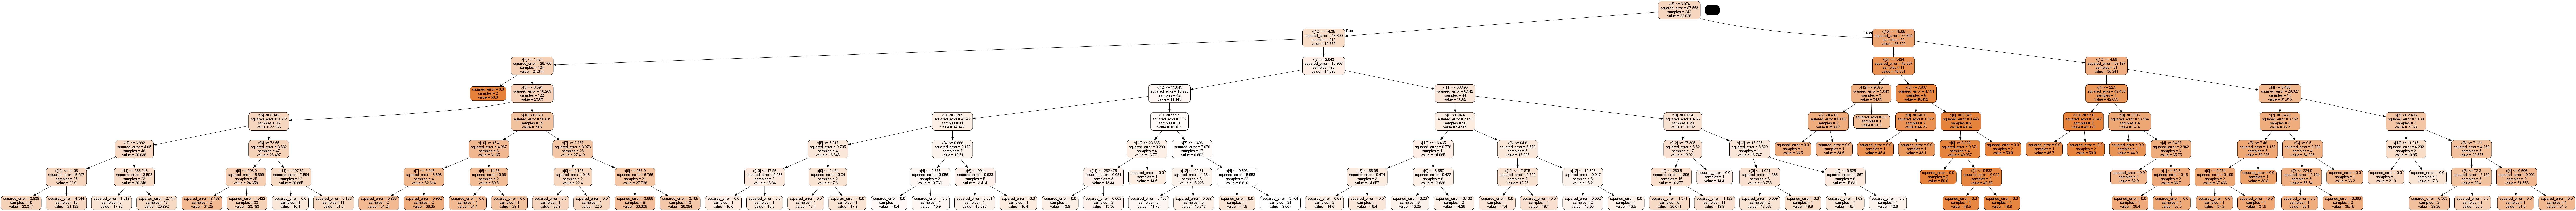

In [19]:
# 可视化决策树
from sklearn import tree
import pydotplus
from IPython.display import Image, display

# 从随机森林模型中选取一棵决策树进行可视化
estimator = rf_reg.estimators_[3]
dot_data  = tree.export_graphviz(estimator,
                                 out_file = None,
                                 #feature_names = iris_feature_name,
                                 #class_names = iris_target_name,
                                 filled=True,
                                 rounded=True
                                )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

# 特征重要度分析

In [20]:
rf_reg.feature_importances_

array([0.05998704, 0.00191479, 0.03877095, 0.00109651, 0.03069956,
       0.37705058, 0.01518544, 0.04382204, 0.00488646, 0.01867666,
       0.02845787, 0.01146052, 0.36799155])

In [21]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PIRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
import numpy as np
print('特征排序:')
feature_names = X.columns
feature_importances = rf_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]

for index in indices:
    print("feature %s (%f)" %(feature_names[index], feature_importances[index]))

特征排序:
feature RM (0.377051)
feature LSTAT (0.367992)
feature CRIM (0.059987)
feature DIS (0.043822)
feature INDUS (0.038771)
feature NOX (0.030700)
feature PIRATIO (0.028458)
feature TAX (0.018677)
feature AGE (0.015185)
feature B (0.011461)
feature RAD (0.004886)
feature ZN (0.001915)
feature CHAS (0.001097)


([<matplotlib.axis.XTick at 0x29466a97d50>,
 [Text(0, 0, 'RM'),
  Text(1, 0, 'LSTAT'),
  Text(2, 0, 'CRIM'),
  Text(3, 0, 'DIS'),
  Text(4, 0, 'INDUS'),
  Text(5, 0, 'NOX'),
  Text(6, 0, 'PIRATIO'),
  Text(7, 0, 'TAX'),
  Text(8, 0, 'AGE'),
  Text(9, 0, 'B'),
  Text(10, 0, 'RAD'),
  Text(11, 0, 'ZN'),
  Text(12, 0, 'CHAS')])

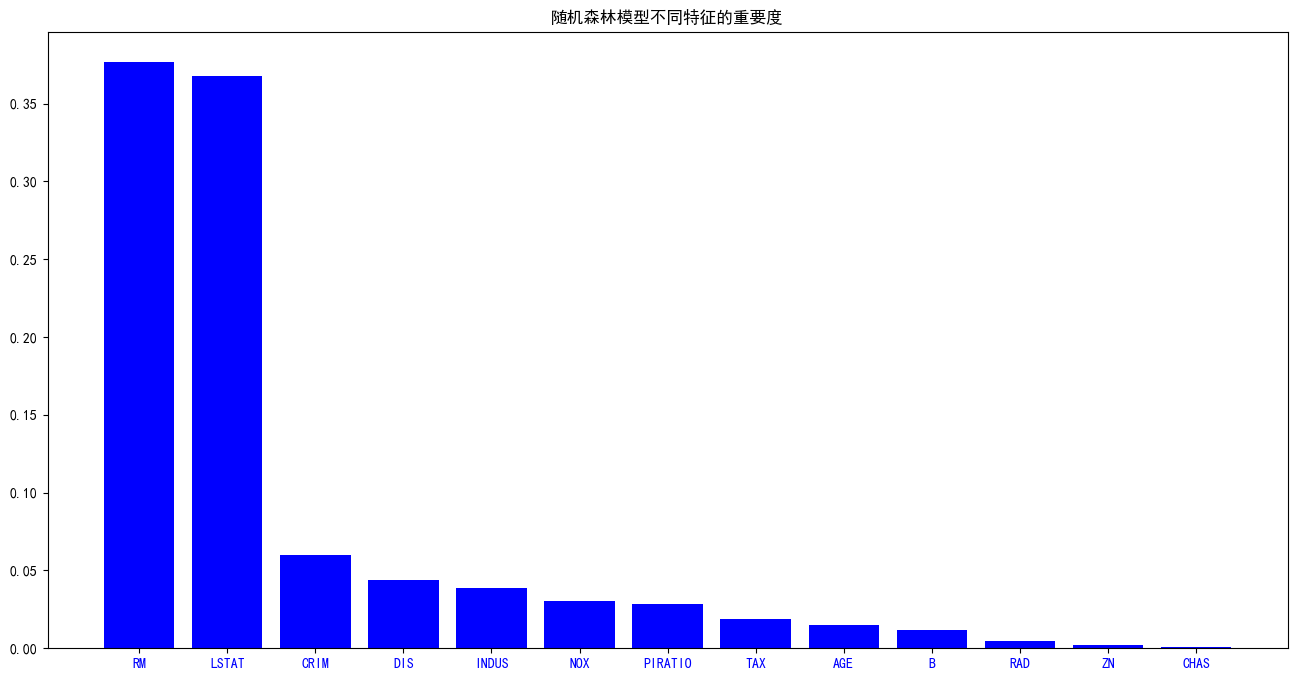

In [24]:
plt.figure(figsize=(16,8))
plt.title("随机森林模型不同特征的重要度")
plt.bar(range(len(feature_importances)), feature_importances[indices], color='b')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], color='b')

# 可视化测试集上的回归预测结果

In [30]:
result = {"label":y_test, "prediction":rf_reg.predict(x_test)}
result = pd.DataFrame(result)

In [31]:
result.head()

,label,prediction
329,22.6,24.323424
371,50.0,25.982952
219,23.0,21.753227
403,8.3,10.422314
78,21.2,20.953647


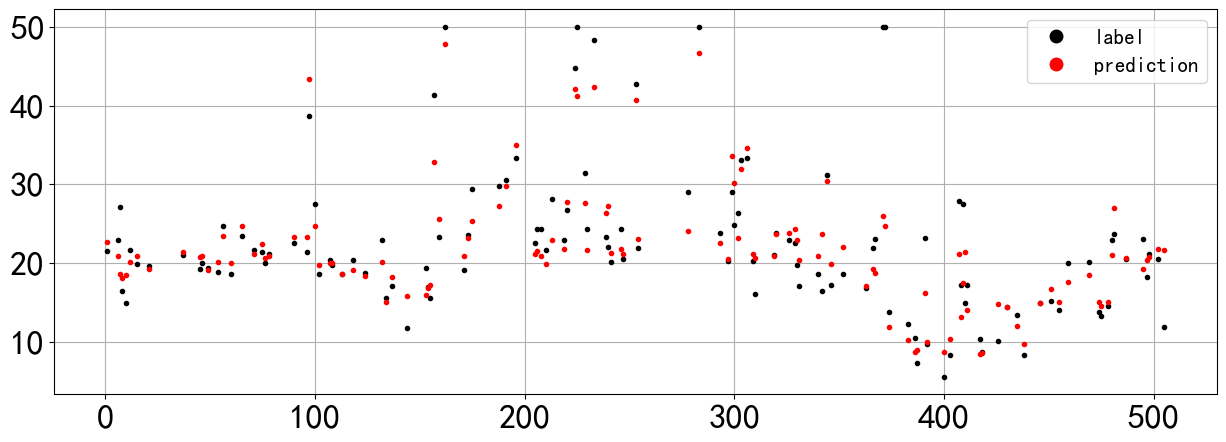

In [32]:
result['label'].plot(style='k.', figsize=(15, 5))
result['prediction'].plot(style='r.')
# 设置图例文字大小和图示大小
plt.legend(fontsize=15, markerscale=3)
# 设置坐标文字大小
plt.tick_params(labelsize=25)
# 生成刻度线网格
plt.grid()

# 计算MSE均方差和RMSE均方根误差

In [33]:
from sklearn import metrics

In [35]:
MSE = metrics.mean_squared_error(y, rf_reg.predict(X))

In [36]:
MSE

6.675922141530775

In [37]:
np.sqrt(MSE)

2.5837805908263136

# 提交结果

In [38]:
submission = {"prediction":rf_reg.predict(x_test)}
submission = pd.DataFrame(submission)

In [39]:
submission.head()

,prediction
0,24.323424
1,25.982952
2,21.753227
3,10.422314
4,20.953647


In [40]:
submission.to_csv("数据提交.csv")